In [58]:
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,MiniBatchKMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1 : Reading and Exploring the Dataset

In [59]:
# Import datasets
data = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [60]:
#Display the numbers of rows & columns
data.shape

(541909, 8)

In [61]:
# dataframe info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [62]:
# dataframe description

data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Step 2 : Data Cleansing

In [63]:
# Finding the Missing Values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [64]:
# Droping rows having missing values

data = data.dropna()
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [65]:
#Display the numbers of rows & columns
data.shape

(406829, 8)

In [66]:
#checking for duplicates
data.duplicated().sum()

5225

In [67]:
#removing duplicates
data.drop_duplicates(keep='first', inplace=True)
data.shape

(401604, 8)

In [68]:
# counts of the negative values in the Quantity (These are possibly canceled and returned orders)
data[data['Quantity'] <0].shape[0]

8872

In [69]:
data[data['Quantity'] <0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom


In [70]:
#Therefore we can say,If the invoice number starts with the letter "C", it means the order was cancelled Or those who abandon their order.

data['cancellation']=data.InvoiceNo.str.extract('([C])').fillna(0).replace({'C':1})
data['cancellation'].value_counts()

0    392732
1      8872
Name: cancellation, dtype: int64

In [71]:
data[(data.cancellation==1) & (data.Quantity>0)]
# therefore we can say, if cancellation = 1, quantity < 0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation


In [72]:
# Drop Quantity negative value
# (data.Quantity < 0).sum()

data = data[(data.Quantity > 0)]

In [73]:
# counts of the negative values in the unit price
data[data['UnitPrice'] <0].shape[0]

0

In [74]:
data = data.drop(['cancellation'], axis = 1)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [75]:
# Change the datatype of Customer Id as per Business understanding

data['CustomerID'] = data['CustomerID'].astype(str)

In [76]:
# change the data type of InvoiceDate to Datetime.

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [77]:
# dataframe info

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  object        
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


# Step 3 : Data Preparation - RFM Analysis

In [78]:
# New Attribute : Monetary - Total amount of transactions (revenue contributed)

data['Amount'] = data['Quantity']*data['UnitPrice']
data_M = data.groupby('CustomerID')['Amount'].sum()
data_M = data_M.reset_index()
data_M.columns = ['CustomerID', 'Monetary']
data_M.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [79]:
# New Attribute : Frequency - Number of tracsactions

data_F = data.groupby('CustomerID')['InvoiceNo'].count()
data_F = data_F.reset_index()
data_F.columns = ['CustomerID', 'Frequency']
data_F.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [80]:
# Merging the two dfs

data_FM = pd.merge(data_F, data_M, on='CustomerID', how='inner')
data_FM.head()

,CustomerID,Frequency,Monetary
0,12346.0,1,77183.60
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [81]:
# New Attribute : Recency - Number of days since last purchase

max_date = max(data['InvoiceDate']) #Compute the maximum date to know the last transaction date
data['Last_Transaction'] = max_date - data['InvoiceDate'] #Compute the difference between max date and transaction date

data_R = data.groupby('CustomerID')['Last_Transaction'].min() #Compute last transaction date to get the recency of customers
data_R = data_R.reset_index()
data_R.columns = ['CustomerID', 'Recency']
data_R.head()

,CustomerID,Recency
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [82]:
# Extract number of days only

data_R['Recency'] = data_R['Recency'].dt.days
data_R.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [83]:
# Merge tha dataframes to get the final RFM dataframe


data_RFM = pd.merge(data_R, data_FM, on='CustomerID', how='inner')
data_RFM.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
data_RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


Text(0.5, 0, 'Attributes')

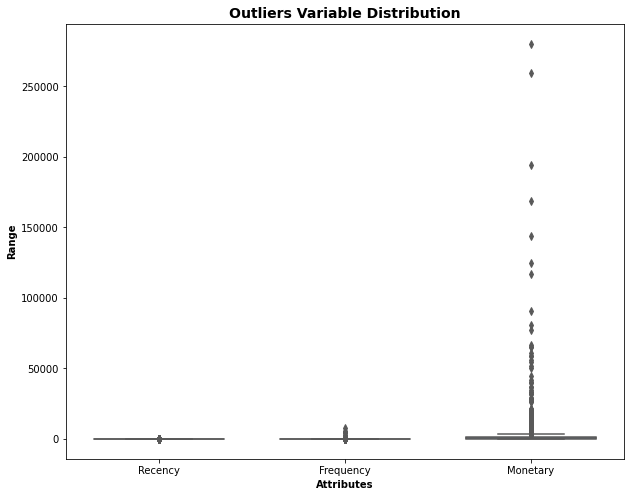

In [84]:
# Outlier Analysis of Recency, Frequency and Monetary

attributes = ['Recency','Frequency','Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data_RFM[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [85]:
# Removing (statistical) outliers for Recency
Q1 = data_RFM.Recency.quantile(0.25)
Q3 = data_RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
data_RFM = data_RFM[(data_RFM.Recency >= Q1 - 1.5*IQR) & (data_RFM.Recency <= Q3 + 1.5*IQR)] # lower limit and upper limit

In [86]:
# Removing (statistical) outliers for Frequency
Q1 = data_RFM.Frequency.quantile(0.25)
Q3 = data_RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
data_RFM = data_RFM[(data_RFM.Frequency >= Q1 - 1.5*IQR) & (data_RFM.Frequency <= Q3 + 1.5*IQR)] # lower limit and upper limit

In [87]:
# Removing (statistical) outliers for Monetary
Q1 = data_RFM.Monetary.quantile(0.25)
Q3 = data_RFM.Monetary.quantile(0.75)
IQR = Q3 - Q1
data_RFM = data_RFM[(data_RFM.Monetary >= Q1 - 1.5*IQR) & (data_RFM.Monetary <= Q3 + 1.5*IQR)] # lower limit and upper limit

In [88]:
data_RFM.head()

,CustomerID,Recency,Frequency,Monetary
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
5,12352.0,35,85,2506.04
6,12353.0,203,4,89.00


Text(0.5, 0, 'Attributes')

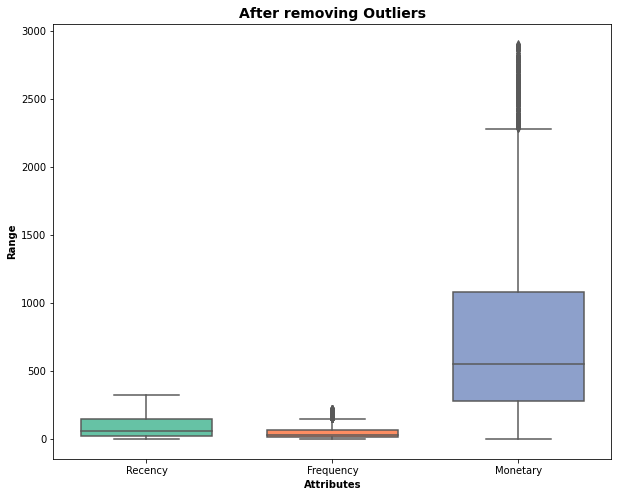

In [89]:
# Analysis of Recency, Frequency and Monetary after removing outliers

attributes = ['Recency','Frequency','Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data_RFM[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("After removing Outliers", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [90]:
# Rescaling the Attributes using Standadization method (It is extremely important to rescale the variables so that they have a comparable scale)

data_RFM_2 = data_RFM[['Recency', 'Frequency', 'Monetary']]

# Instantiate
scaler = StandardScaler()

# fit_transform
data_RFM_scaled = scaler.fit_transform(data_RFM_2)
data_RFM_scaled.shape

(3504, 3)

In [91]:
data_RFM_scaled = pd.DataFrame(data_RFM_scaled)
data_RFM_scaled.columns = ['Recency', 'Frequency', 'Monetary']
data_RFM_scaled.head()

,Recency,Frequency,Monetary
0,-0.201882,-0.391807,1.541445
1,-0.824599,0.541393,1.481697
2,2.411305,-0.702874,-0.660684
3,-0.635560,0.808021,2.608458
4,1.232591,-0.991721,-1.030104


# Step 4.1 : Building the Model - K-Means Clustering

In [92]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(data_RFM_scaled)

KMeans(max_iter=50, n_clusters=4)

In [93]:
#Extract the results
#kmeans.labels_
identified_clusters = kmeans.fit_predict(data_RFM_scaled)
identified_clusters

array([1, 1, 0, ..., 0, 3, 1])

In [94]:
#Display the length of the identified clusters
len(identified_clusters)

3504

In [95]:
data_RFM.head()

,CustomerID,Recency,Frequency,Monetary
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
5,12352.0,35,85,2506.04
6,12353.0,203,4,89.00


In [96]:
# data_RFM['ClusterNo'] = identified_clusters
# data_RFM.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'ClusterNo']
# data_RFM.head(15)

# assign the label
data_RFM['Kmeans_Cluster_ID'] = kmeans.labels_
data_RFM.head()

,CustomerID,Recency,Frequency,Monetary,Kmeans_Cluster_ID
2,12348.0,74,31,1797.24,1
3,12349.0,18,73,1757.55,1
4,12350.0,309,17,334.40,0
5,12352.0,35,85,2506.04,2
6,12353.0,203,4,89.00,0


In [97]:
# Drop Cluster_Id column
data_RFM = data_RFM.drop(['Kmeans_Cluster_ID'], axis = 1)
data_RFM.head()

,CustomerID,Recency,Frequency,Monetary
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
5,12352.0,35,85,2506.04
6,12353.0,203,4,89.00


Text(0, 0.5, 'Within-cluster Sum of Squares')

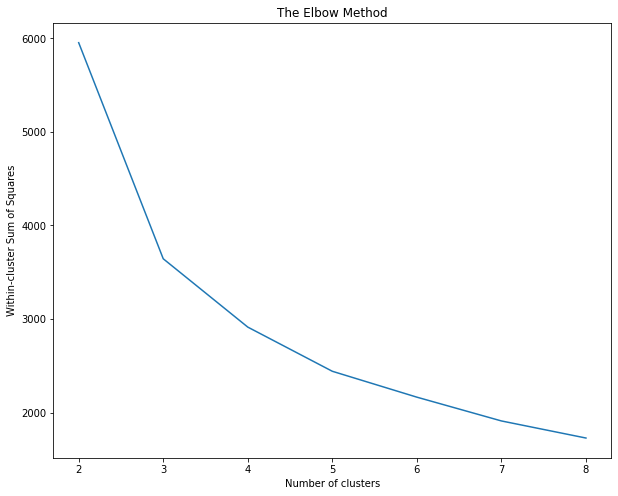

In [98]:
# Finding the Optimal Number of Clusters using Elbow curve

#generate WCSS for different number of clusters with same data in our data frame
wcss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = clusters, max_iter=50)
    kmeans.fit(data_RFM_scaled)
    
    wcss.append(kmeans.inertia_)

number_clusters = range_n_clusters
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [99]:
# Silhouette analysis
from sklearn.metrics import silhouette_score

# p  is the mean distance to the points in the nearest cluster that the data point is not a part of
# q is the mean intra-cluster distance to all the points in its own cluster.

# The value of the silhouette score range lies between -1 to 1.
# A score closer to 1 indicates that the data point is very similar to other data points in the cluster
# A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters = clusters, max_iter=50)
    kmeans.fit(data_RFM_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_RFM_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4226285754709767
For n_clusters=3, the silhouette score is 0.437758429984845
For n_clusters=4, the silhouette score is 0.3886074880212718
For n_clusters=5, the silhouette score is 0.4062352313626658
For n_clusters=6, the silhouette score is 0.3538768189751682
For n_clusters=7, the silhouette score is 0.3320240297809402
For n_clusters=8, the silhouette score is 0.3398397733227258


In [100]:
# Final model with k=3
kmeans = KMeans(n_clusters = 3, max_iter=50)
kmeans.fit(data_RFM_scaled)

KMeans(max_iter=50, n_clusters=3)

In [101]:
#Extract the results
#kmeans.labels_
identified_clusters = kmeans.fit_predict(data_RFM_scaled)
identified_clusters

array([1, 1, 0, ..., 0, 2, 1])

In [102]:
# assign the label
data_RFM['Kmeans_Cluster_ID'] = kmeans.labels_
data_RFM.head()

,CustomerID,Recency,Frequency,Monetary,Kmeans_Cluster_ID
2,12348.0,74,31,1797.24,1
3,12349.0,18,73,1757.55,1
4,12350.0,309,17,334.40,0
5,12352.0,35,85,2506.04,1
6,12353.0,203,4,89.00,0


<AxesSubplot:xlabel='Kmeans_Cluster_ID', ylabel='Recency'>

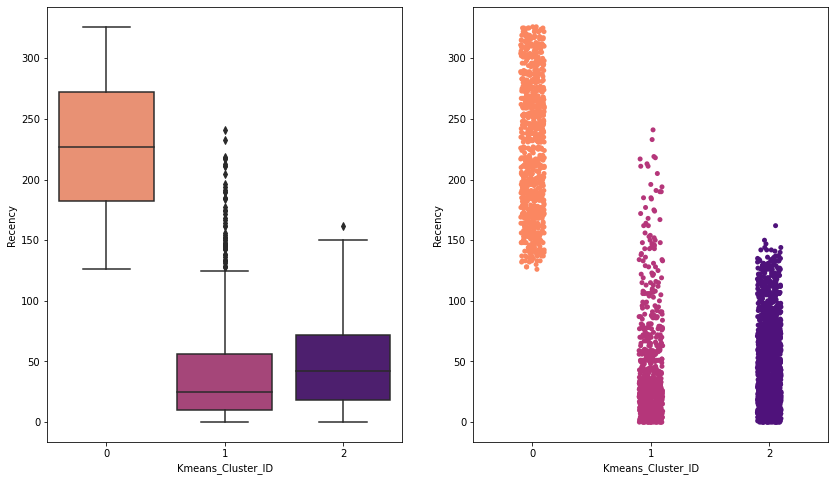

In [103]:
# visualize Cluster Id vs Recency

fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (14,8))

sns.boxplot(x='Kmeans_Cluster_ID', y='Recency', data=data_RFM, ax = ax[0], palette='magma_r')
sns.stripplot(x='Kmeans_Cluster_ID', y='Recency', data=data_RFM, ax = ax[1], palette='magma_r') 

<AxesSubplot:xlabel='Kmeans_Cluster_ID', ylabel='Frequency'>

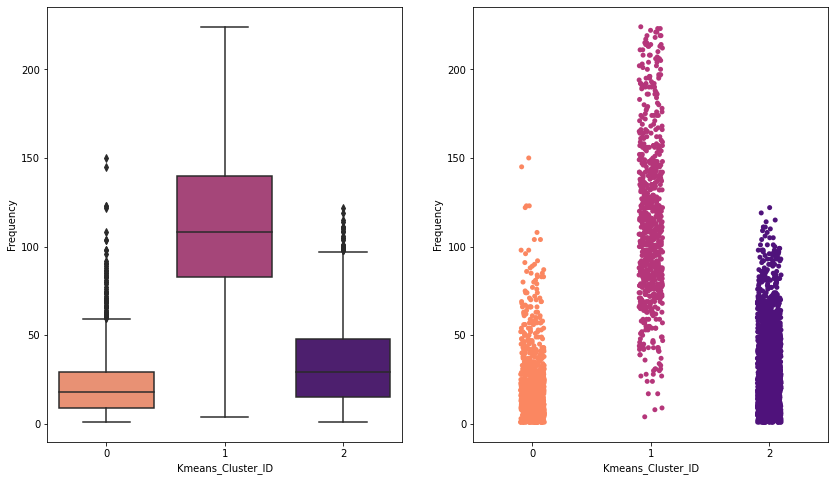

In [104]:
# visualize Cluster Id vs Frequency

fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (14,8))

sns.boxplot(x='Kmeans_Cluster_ID', y='Frequency', data=data_RFM, ax = ax[0], palette='magma_r')
#sns.barplot(x='Kmeans_Cluster_ID', y='Frequency', data=data_RFM, ax = ax[0], palette='magma_r')
sns.stripplot(x='Kmeans_Cluster_ID', y='Frequency', data=data_RFM, ax = ax[1], palette='magma_r') 

<AxesSubplot:xlabel='Kmeans_Cluster_ID', ylabel='Monetary'>

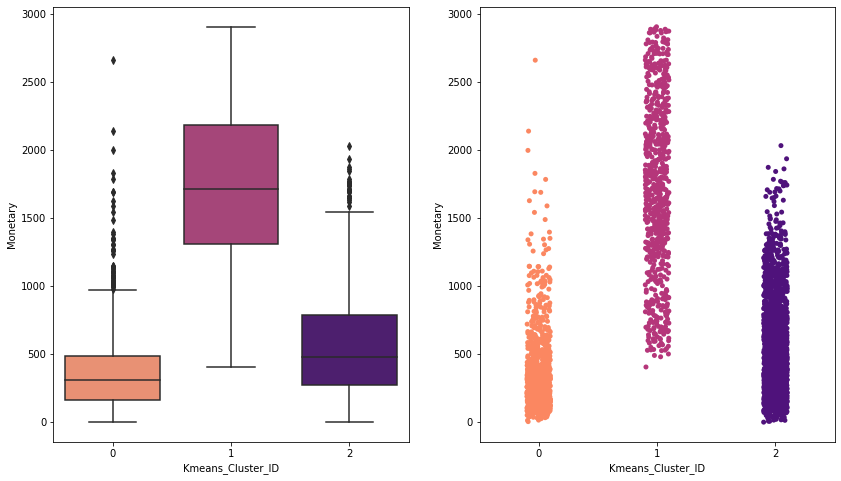

In [105]:
# visualize Cluster Id vs Monetary

fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (14,8))

sns.boxplot(x='Kmeans_Cluster_ID', y='Monetary', data=data_RFM, ax = ax[0], palette='magma_r')
#sns.barplot(x='Kmeans_Cluster_ID', y='Monetary', data=data_RFM, ax = ax[0], palette='magma_r')
sns.stripplot(x='Kmeans_Cluster_ID', y='Monetary', data=data_RFM, ax = ax[1], palette='magma_r')

In [106]:
# get a dataframe with CustomerID and Country

data_copy = data.copy()
data_copy = data_copy.drop(['Amount','Last_Transaction','InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice'], axis = 1)
data_copy = data_copy.drop_duplicates()
data_copy.head()

,CustomerID,Country
0,17850.0,United Kingdom
9,13047.0,United Kingdom
26,12583.0,France
46,13748.0,United Kingdom
65,15100.0,United Kingdom


In [107]:
# merge the datafranes

data_RFM_Country = pd.merge(data_RFM, data_copy, on='CustomerID', how='inner')
data_RFM_Country.head()

,CustomerID,Recency,Frequency,Monetary,Kmeans_Cluster_ID,Country
0,12348.0,74,31,1797.24,1,Finland
1,12349.0,18,73,1757.55,1,Italy
2,12350.0,309,17,334.40,0,Norway
3,12352.0,35,85,2506.04,1,Norway
4,12353.0,203,4,89.00,0,Bahrain


In [109]:
# data frame of Cluster ID = 0

data_cluster0 = data_RFM_Country.loc[data_RFM_Country['Kmeans_Cluster_ID'] == 0]
data_cluster0.head()

,CustomerID,Recency,Frequency,Monetary,Kmeans_Cluster_ID,Country
2,12350.0,309,17,334.4,0,Norway
4,12353.0,203,4,89.0,0,Bahrain
5,12354.0,231,58,1079.4,0,Spain
6,12355.0,213,13,459.4,0,Bahrain
10,12361.0,286,10,189.9,0,Belgium


In [110]:
# data frame of Cluster ID = 1

data_cluster1 = data_RFM_Country.loc[data_RFM_Country['Kmeans_Cluster_ID'] == 1]
data_cluster1.head()

,CustomerID,Recency,Frequency,Monetary,Kmeans_Cluster_ID,Country
0,12348.0,74,31,1797.24,1,Finland
1,12349.0,18,73,1757.55,1,Italy
3,12352.0,35,85,2506.04,1,Norway
7,12356.0,22,59,2811.43,1,Portugal
9,12360.0,51,129,2662.06,1,Austria


In [111]:
# data frame of Cluster ID = 2

data_cluster2 = data_RFM_Country.loc[data_RFM_Country['Kmeans_Cluster_ID'] == 2]
data_cluster2.head()

,CustomerID,Recency,Frequency,Monetary,Kmeans_Cluster_ID,Country
8,12358.0,1,19,1168.06,2,Austria
11,12363.0,109,23,552.00,2,Unspecified
14,12367.0,3,11,168.90,2,Denmark
16,12372.0,71,52,1298.04,2,Denmark
18,12374.0,24,33,742.93,2,Austria


# Step 4.2 : Building the Model - Hierarchical Clustering

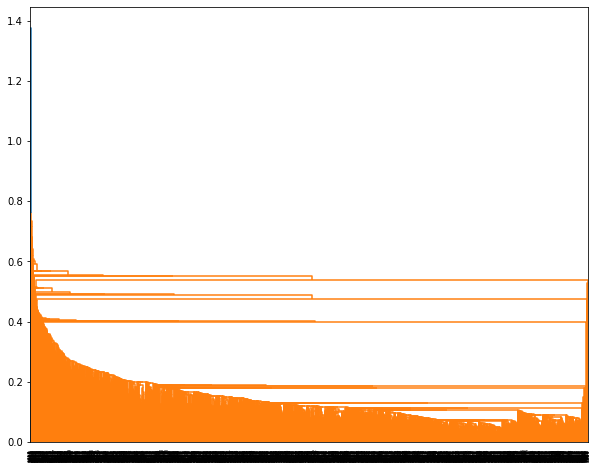

In [112]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# Single linkage: In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster

mergings = linkage(data_RFM_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

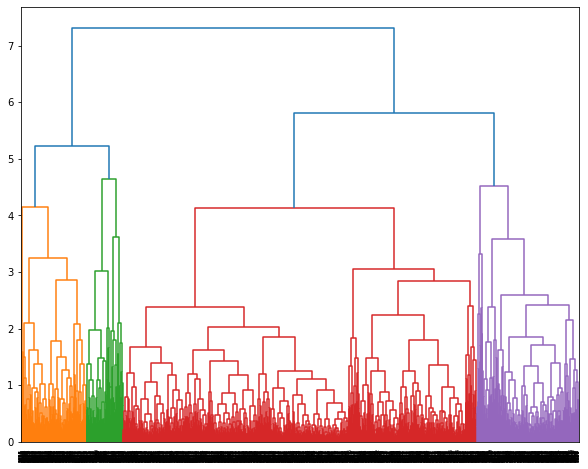

In [113]:
# Complete linkage: In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster.

mergings = linkage(data_RFM_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

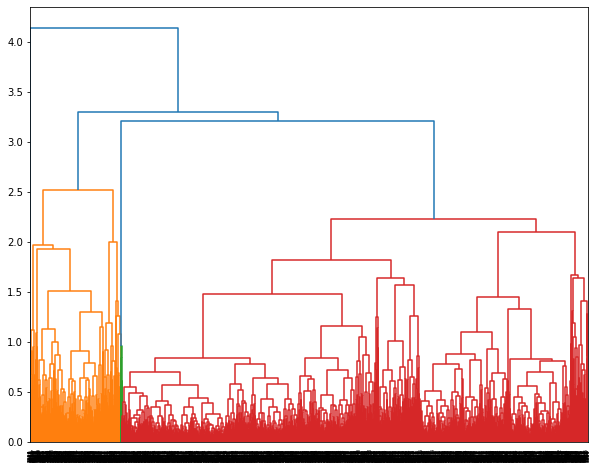

In [114]:
# Average linkage: In average linkage hierarchical clustering, the distance between two clusters is defined as,
# the average distance between each point in one cluster to every point in the other cluster.

mergings = linkage(data_RFM_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [115]:
# Cutting the Dendrogram based on K
# 3 clusters
from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 1])

In [116]:
# Assign cluster labels

data_RFM['hierarchical_Cluster_ID'] = cluster_labels
data_RFM.head()

,CustomerID,Recency,Frequency,Monetary,Kmeans_Cluster_ID,hierarchical_Cluster_ID
2,12348.0,74,31,1797.24,1,0
3,12349.0,18,73,1757.55,1,1
4,12350.0,309,17,334.40,0,0
5,12352.0,35,85,2506.04,1,1
6,12353.0,203,4,89.00,0,0


<AxesSubplot:xlabel='hierarchical_Cluster_ID', ylabel='Recency'>

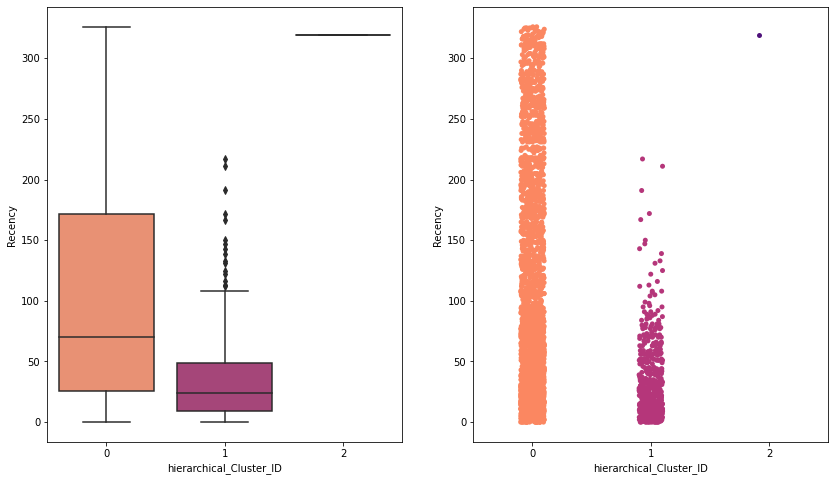

In [117]:
# Plot hierarchical_Cluster_ID vs Recency

fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (14,8))

sns.boxplot(x='hierarchical_Cluster_ID', y='Recency', data=data_RFM, ax = ax[0], palette='magma_r')
sns.stripplot(x='hierarchical_Cluster_ID', y='Recency', data=data_RFM, ax = ax[1], palette='magma_r')


<AxesSubplot:xlabel='hierarchical_Cluster_ID', ylabel='Frequency'>

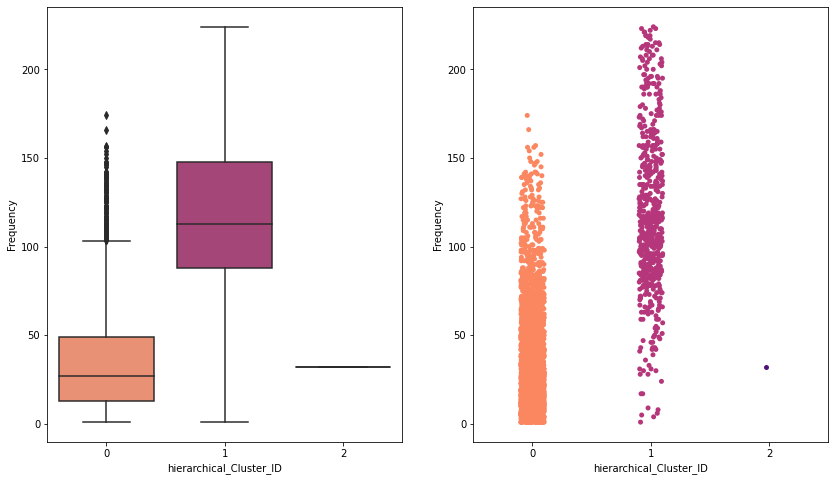

In [118]:
# Plot hierarchical_Cluster_ID vs Frequency

fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (14,8))

sns.boxplot(x='hierarchical_Cluster_ID', y='Frequency', data=data_RFM, ax = ax[0], palette='magma_r')
sns.stripplot(x='hierarchical_Cluster_ID', y='Frequency', data=data_RFM, ax = ax[1], palette='magma_r')

<AxesSubplot:xlabel='hierarchical_Cluster_ID', ylabel='Monetary'>

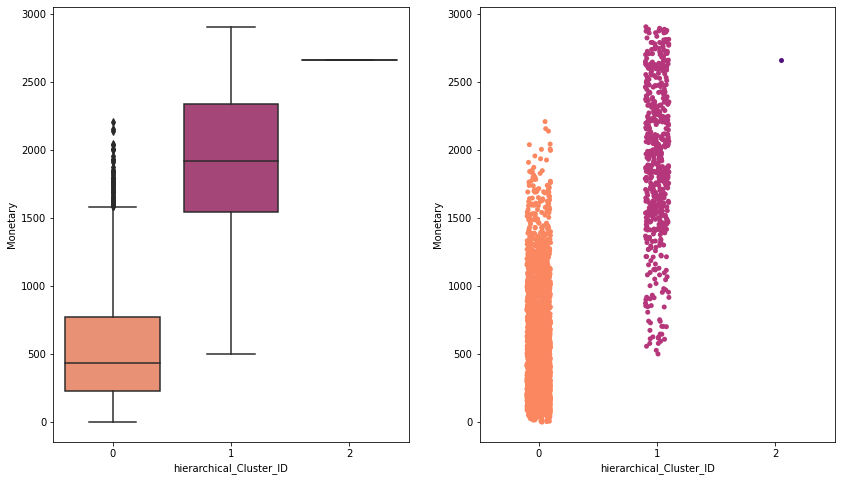

In [119]:
# Plot hierarchical_Cluster_ID vs Monetary

fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (14,8))

sns.boxplot(x='hierarchical_Cluster_ID', y='Monetary', data=data_RFM, ax = ax[0], palette='magma_r')
sns.stripplot(x='hierarchical_Cluster_ID', y='Monetary', data=data_RFM, ax = ax[1], palette='magma_r')

In [120]:
data_RFM.head(10)

,CustomerID,Recency,Frequency,Monetary,Kmeans_Cluster_ID,hierarchical_Cluster_ID
2,12348.0,74,31,1797.24,1,0
3,12349.0,18,73,1757.55,1,1
4,12350.0,309,17,334.40,0,0
5,12352.0,35,85,2506.04,1,1
6,12353.0,203,4,89.00,0,0
7,12354.0,231,58,1079.40,0,0
8,12355.0,213,13,459.40,0,0
9,12356.0,22,59,2811.43,1,1
11,12358.0,1,19,1168.06,2,0
13,12360.0,51,129,2662.06,1,1


# Step 5 : Final Analysis

#### According to K-means clustering we can conclude that,
➢ Most customers in cluster 0 have higher recency which means they have not done any transaction for a long period of time since the last purchase.
And also, their frequency and monetary are very lower which indicates they have done a smaller number of transactions and contributed lesser revenue to the business. 
Therefore, customers in cluster 0 must be given lesser priority.

➢ Most customers in cluster 1 have higher frequency and monetary which is opposite of cluster 1. They have done a larger number of transactions and contributed higher revenue to the business compared to other clusters. Furthermore, their recency is lesser which indicates they are frequent buyers. 
Therefore, customers in cluster 1 must be given higher priority.

➢ Most customers in cluster 2 have slightly higher recency, frequency and monetary values compared to cluster 1, but very lesser than cluster 0.
Therefore, they must be given lesser priority but since they are frequent buyers shouldn’t be ignored.

#### According to K-means clustering we can conclude that,

➢ Most customers in cluster 0 have the highest recency which means they have not done any transaction for a long period of time since the last purchase. 
Therefore,they are not frequent buyers. Furthermore, lesser frequency and monetary compared to cluster 1.

➢ Most customers in cluster 1 have lesser recency which means they have done transactions for a recently.
Furthermore, they have higher frequency and monetary which indicated they have done a larger number of transactions and contributed higher revenue to the business compared to other clusters. Therefore, customers in cluster 1 must be given higher priority.

➢ Number of customers in cluster 2 are very small even if they have higher monetary values.
And also, they have not done transactions recently and done lesser number of transactions. 
Therefore, customers in cluster 2 must be given lesser priority.